# Forcing Patterns and Reversibility

This Notebook will investigate the temperature responses of the upper and lower in the 2-layer model layer to different forcing patterns.

The following forcing patterns will be investigated:

    a. constant positive forcing
    b. constant negative forcing
    c. step increase
    d. step decrease
    e. top hat
    f. linearly increasing forcing
    g. linearly decreasing forcing
    h. triangular forcing
    i. exponentially increasing
    f. sinusoidal forcing

In order to investigate reversibility (the precise meaning of which still must be investigated), we will then perform reflections in the x-axis(if not already obvious), and in time. 

In [17]:
from ar6.twolayermodel import TwoLayerModel
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
runs = {}

First we create the objects corresponding to the different forcing scenarios. I will store the different forcing scenarios in a dictionary, called "runs".

### a) Constant Positive Forcing

We will look at 5 different magnitudes of constant forcing:

1.  0 : No forcing (is this not essentially -1 CO2? )
1.  1 : 1xCO2
1.  2 : 2xCO2
1.  4 : 4xCO2
1.  8 : 8xCO2


In [19]:
#We start with the constant forcing (a)

force_mags = [0,1,2,4,8]

for mag in force_mags:
    print(f"currently on const. mag: %s... "%mag)
    for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
        scm = TwoLayerModel(
            extforce= mag*np.ones(270),
            exttime=np.arange(270),
            tbeg=1750,
            tend=2020,
            lamg=4.0/3.0,
            t2x=None,
            eff=1.29,
            cmix=6,
            cdeep=75,
            gamma_2l=0.7,
            outtime=np.arange(1750.5,2020),
            dt=1
        )

        out = scm.run()
    
    runs[f"const_%s" %mag] = out

currently on const. mag: 0... 


100%|██████████| 1000/1000 [00:14<00:00, 71.35it/s]


currently on const. mag: 1... 


100%|██████████| 1000/1000 [00:15<00:00, 62.87it/s]


currently on const. mag: 2... 


100%|██████████| 1000/1000 [00:15<00:00, 62.74it/s]


currently on const. mag: 4... 


100%|██████████| 1000/1000 [00:15<00:00, 62.82it/s]


currently on const. mag: 8... 


100%|██████████| 1000/1000 [00:16<00:00, 61.25it/s]


### b) Constant Negative Forcing

We will look at 4 different magnitudes of constant forcing:

1.  -1 : -1xCO2
1.  -2 : -2xCO2
1.  -4 : -4xCO2
1.  -8 : -8xCO2


In [20]:
#We start with the constant forcing (a)

force_mags = [-1,-2,-4,-8]

for mag in force_mags:
    print(f"currently on const. mag: %s... "%mag)
    for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
        scm = TwoLayerModel(
            extforce= mag *np.ones(270),
            exttime=np.arange(270),
            tbeg=1750,
            tend=2020,
            lamg=4.0/3.0,
            t2x=None,
            eff=1.29,
            cmix=6,
            cdeep=75,
            gamma_2l=0.7,
            outtime=np.arange(1750.5,2020),
            dt=1
        )

        out = scm.run()
    
    runs[f"const_%s" %mag] = out

currently on const. mag: -1... 


100%|██████████| 1000/1000 [00:15<00:00, 62.94it/s]


currently on const. mag: -2... 


100%|██████████| 1000/1000 [00:15<00:00, 63.58it/s]


currently on const. mag: -4... 


100%|██████████| 1000/1000 [00:15<00:00, 63.02it/s]


currently on const. mag: -8... 


100%|██████████| 1000/1000 [00:18<00:00, 55.50it/s]


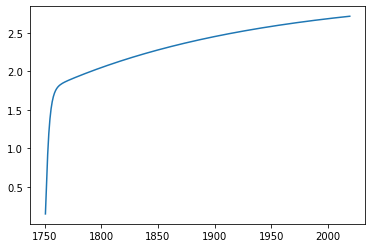

In [21]:
sus_run = runs["const_4"]

plt.plot(sus_run.time, sus_run.tg)

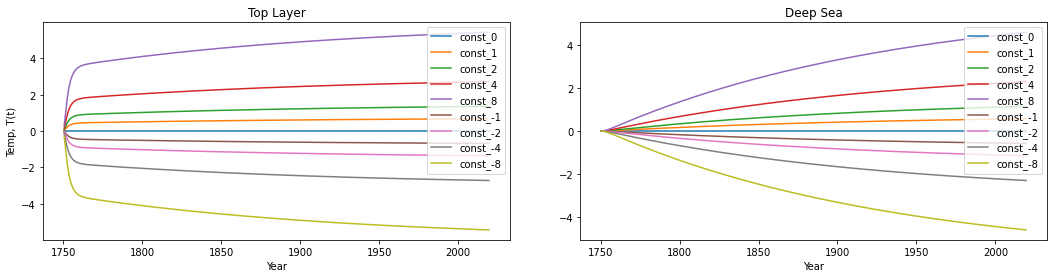

In [22]:
# Plotting the constant forcing scenarios

fig, axs = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.15); fig.set_figwidth(18)
axs[0].set_ylabel('Temp, T(t)');


scenario_names = list(runs.keys())
run_outputs = list(runs.values())
layers = ["Top Layer", "Deep Sea"]

for (run, scen) in zip (run_outputs, scenario_names):
    for (subpl, col, layer) in zip(axs, [0,1], layers):
        if col == 0:
            subpl.plot(run.time, run.tg, label = scen)
        else:
             subpl.plot(run.time, run.tlev[:,1], label = scen)
        subpl.title.set_text(layer)
        subpl.set_xlabel('Year')
    
for subpl in axs:
    
    subpl.legend()

Results above look as expected. Not mega interesting. 
What is more interesting is potentially the difference between the top layer and the deep sea...

Top layer reaches an (almost) equilibrium within the time range, the Deep sea layer does not.

==> Maybe looking at a longer time range will be interesting (but not so useful?)

### c) Step Increase & d) Step Decrease

We will implement a step increase/decrease to/from 4xCO2 halfway through the time range.

Notice how in the pots above 4xCO2 seems like a decent value to look at... In reality we picked this purely because it was the default in the original notebook, but Geoffroy should be read in more detail to figure out why 4xCO2 was picked instead of the standard 2xCO2...

==> Read Geoffroy to answer.

In [70]:
#Step forcing. 

stepIncrease = 4*np.ones(270)
stepIncrease[:int(270/2)] = 0

stepDecrease = 4*np.ones(270)
stepDecrease[int(270/2):] = 1

steps = [stepIncrease, stepDecrease]
step_names = ["Step Increase", "Step Decrease"]

for (step, name) in zip(steps, step_names):
    print(f"currently on %s... "%name)
    for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
        scm = TwoLayerModel(
            extforce= step,
            exttime=np.arange(270),
            tbeg=1750,
            tend=2020,
            lamg=4.0/3.0,
            t2x=None,
            eff=1.29,
            cmix=6,
            cdeep=75,
            gamma_2l=0.7,
            outtime=np.arange(1750.5,2020),
            dt=1
        )
        
        out = scm.run()
    if name == "Step Increase":
        runs["Step Increase"] = out
    elif name == "Step Decrease":
        runs["Step Decrease"] = out

currently on Step Increase... 


100%|██████████| 1000/1000 [00:19<00:00, 50.87it/s]


currently on Step Decrease... 


100%|██████████| 1000/1000 [00:15<00:00, 63.45it/s]


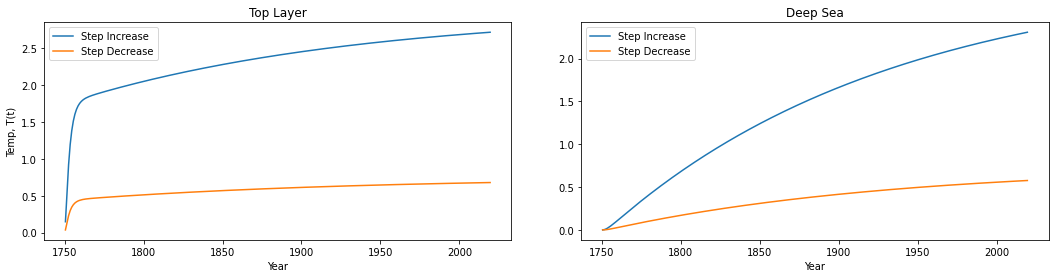

In [53]:
# Plotting the step forcing scenarios

fig, axs = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.15); fig.set_figwidth(18)
axs[0].set_ylabel('Temp, T(t)');


scenario_names = step_names
run_outputs = [runs.get(key) for key in step_names]

layers = ["Top Layer", "Deep Sea"]

for (run, scen) in zip (run_outputs, scenario_names):
    for (subpl, col, layer) in zip(axs, [0,1], layers):
        if col == 0:
            subpl.plot(run.time, run.tg, label = scen)
        else:
             subpl.plot(run.time, run.tlev[:,1], label = scen)
        subpl.title.set_text(layer)
        subpl.set_xlabel('Year')
    
for subpl in axs:
    
    subpl.legend()

What is happening with out step decrease? I checked it again and got the same results... See below for (now fixed) issue.

==> Maybe the decrease sets in too soon and we can't see the effects at all? This is strange, I wouldn't have expected the inertia (?) to be that great. 
 No, this is not the case. we get the constant T(t) = 0 when we decrease to 0.. If we go to 1, we do not get this issue.
==> We need to look at what this forcing actually is in depth. What does a 0 forcing mean?

The step decrease does not result in a drop in temperature. Maybe if we suddenly reversed it it would.. that will be top hat.

The thermal inertia of the deep sea means that step changes aren't very visible/ different to constant forcings..

In [55]:

stepDecrease = 4*np.ones(270)
stepDecrease[int(270/1.3):] = 0


for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
        scm = TwoLayerModel(
            extforce= stepDecrease,
            exttime=np.arange(270),
            tbeg=1750,
            tend=2020,
            lamg=4.0/3.0,
            t2x=None,
            eff=1.29,
            cmix=6,
            cdeep=75,
            gamma_2l=0.7,
            outtime=np.arange(1750.5,2020),
            dt=1
        )
        outde = scm.run()


100%|██████████| 1000/1000 [00:13<00:00, 71.63it/s]


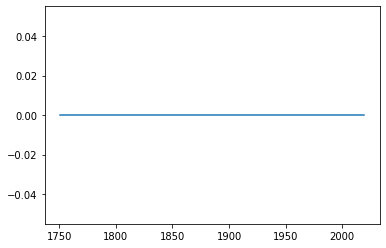

In [56]:
plt.plot(outde.time, outde.tg)


### e) Top hat

A combination of c) and d). 

From lessons learned with step decrease, we will go 1-4-1, instead of 0-4-0...

100%|██████████| 1000/1000 [00:20<00:00, 48.53it/s]


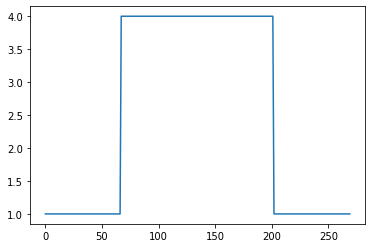

In [58]:
#Step forcing. 

topHat = np.ones(270)
topHat[int(270/4):int(3*270/4)] = 4

plt.plot(topHat)

for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
    scm = TwoLayerModel(
        extforce= step,
        exttime=np.arange(270),
        tbeg=1750,
        tend=2020,
        lamg=4.0/3.0,
        t2x=None,
        eff=1.29,
        cmix=6,
        cdeep=75,
        gamma_2l=0.7,
        outtime=np.arange(1750.5,2020),
        dt=1
        )
        
    out = scm.run()

    runs["TopHat"] = out


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


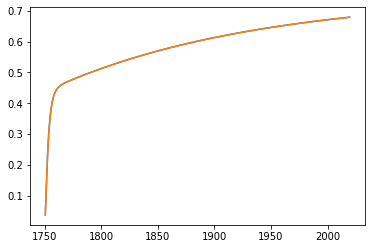

In [65]:
outth = runs["TopHat"]
plt.plot(outth.time, outth.tg)

outsd = runs["Step Decrease"]
plt.plot(outsd.time, outsd.tg)

print(outth.tg - outsd.tg)

['Step Increase', 'Step Decrease', 'TopHat']


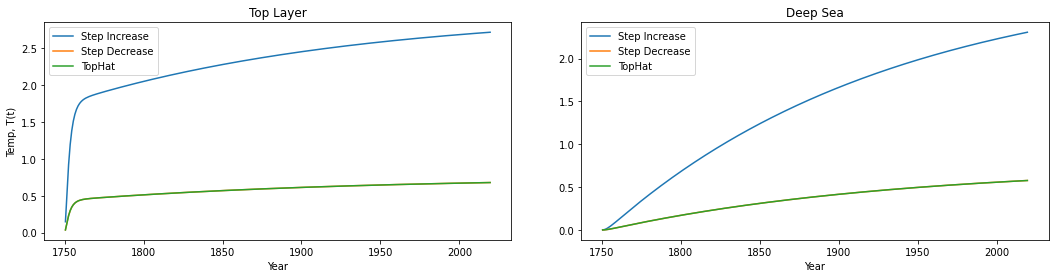

In [72]:
# Plotting the step forcing scenarios

fig, axs = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.15); fig.set_figwidth(18)
axs[0].set_ylabel('Temp, T(t)');


scenario_names = step_names+["TopHat"]
print(scenario_names)
run_outputs = [runs.get(key) for key in scenario_names]

layers = ["Top Layer", "Deep Sea"]

for (run, scen) in zip (run_outputs, scenario_names):
    for (subpl, col, layer) in zip(axs, [0,1], layers):
        if col == 0:
            subpl.plot(run.time, run.tg, label = scen)
        else:
             subpl.plot(run.time, run.tlev[:,1], label = scen)
        subpl.title.set_text(layer)
        subpl.set_xlabel('Year')
    
for subpl in axs:
    
    subpl.legend()

Step decrease and top hat are identical. Why?
-The initial low forcing stage is too short? What if this is a longer period? Let's look below.

100%|██████████| 1000/1000 [00:17<00:00, 56.92it/s]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


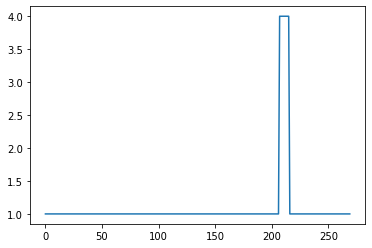

In [73]:
#Step forcing. 

topHat = np.ones(270)
topHat[int(270/1.3):int(3.2*270/4)] = 4

plt.plot(topHat)

for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
    scm = TwoLayerModel(
        extforce= step,
        exttime=np.arange(270),
        tbeg=1750,
        tend=2020,
        lamg=4.0/3.0,
        t2x=None,
        eff=1.29,
        cmix=6,
        cdeep=75,
        gamma_2l=0.7,
        outtime=np.arange(1750.5,2020),
        dt=1
        )
        
    outth2 = scm.run()




outsd = runs["Step Decrease"]

print(outth2.tg - outsd.tg)


No, the start time/length of the top hat is not the problem. I'm now a bit suspicious of our step decrease result. Let me run again.

Is the step decrease result identical to the 1xCO2 constant forcing?

outsd = runs["Step Decrease"]
out1CO2 = runs[""]

print(outth2.tg - outsd.tg)